In [54]:
import os
from openai import OpenAI
from sklearn.metrics.pairwise import cosine_similarity
from functools import cache

client = OpenAI(
    api_key = os.environ["OAI"]
)

In [55]:
@cache
def getEmbeddings(input: str):
    model = "text-embedding-ada-002"
    embeddings = client.embeddings.create(input=input, model=model)
    return embeddings.data[0].embedding

In [56]:
peter = getEmbeddings("Peter Pan")
peter2 = getEmbeddings("Peter Pan")
tinkerbell = getEmbeddings("Tinkerbell")
homer = getEmbeddings("Homer Simpson")
baseball = getEmbeddings("Baseball")

In [57]:
peter == peter2

True

In [58]:
cosine_similarity([peter], [tinkerbell])[0][0]

0.8896339154672512

In [59]:
cosine_similarity([baseball], [tinkerbell])[0][0]

0.7850356098465253

In [60]:
cosine_similarity([baseball], [peter])[0][0]

0.7845955445203333

In [61]:
cosine_similarity([peter], [homer])[0][0]

0.8158687179595127

In [62]:
cosine_similarity([tinkerbell], [homer])[0][0]

0.821846314535208

In [63]:
cosine_similarity([baseball], [homer])[0][0]

0.7942798388491321

In [64]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

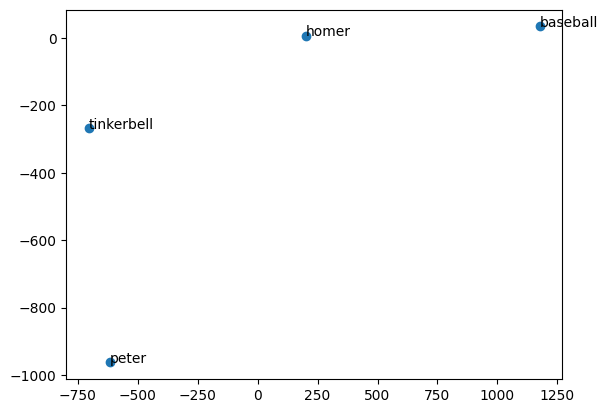

In [77]:

matrix = np.array([baseball, homer, tinkerbell, peter])
tsne = TSNE(n_components=2, perplexity=2, random_state=20, init='pca', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
x = vis_dims[:,0]
y = vis_dims[:,1]
labels = ["baseball", "homer", "tinkerbell", "peter"]
[plt.text(i, j, l) for (i, j, l) in zip(x, y, labels)]
plt.scatter(x, y)

In [88]:
words = [
"Aurora",
"Bungalow",
"Chatoyant",
"Demure",
"Denouement",
"Effervescent",
"Elegance",
"Elixir",
"Eloquence",
"Ephemeral",
"Epiphany",
"Eternity",
"Ethereal",
"Eudaemonia",
"Euphoria",
"Extravagance",
"Felicity",
"Idyllic",
"Incandescent",
"Incendiary",
"Ineffable",
"Infatuation",
"Labyrinth",
"Lagoon",
"Lithe",
"Love",
"Lullaby",
"Luminescence",
"Lyrical",
"Melancholy",
"Mellifluous",
"Miraculous",
"Nefarious",
"Nemesis",
"Oblivion",
"Onomatopoeia",
"Opulence",
"Paradox",
"Peace",
"Picturesque",
"Plethora",
"Pristine",
"Propinquity",
"Quintessence",
"Rainbow",
"Renaissance",
"Ripple",
"Sanguine",
"Scintilla",
"Sequoia",
"Serendipity",
"Sibilant",
"Silhouette",
"Solitude",
"Sonorous",
"Sumptuous",
"Surreptitious",
"Syzygy",
"To cherish",
"Tranquility",
"Umbrella",
"Wanderlust",
"Wherewithal",
"Wistfulness",
"Zenith"
]

In [89]:
embeddings = [getEmbeddings(word) for word in words]

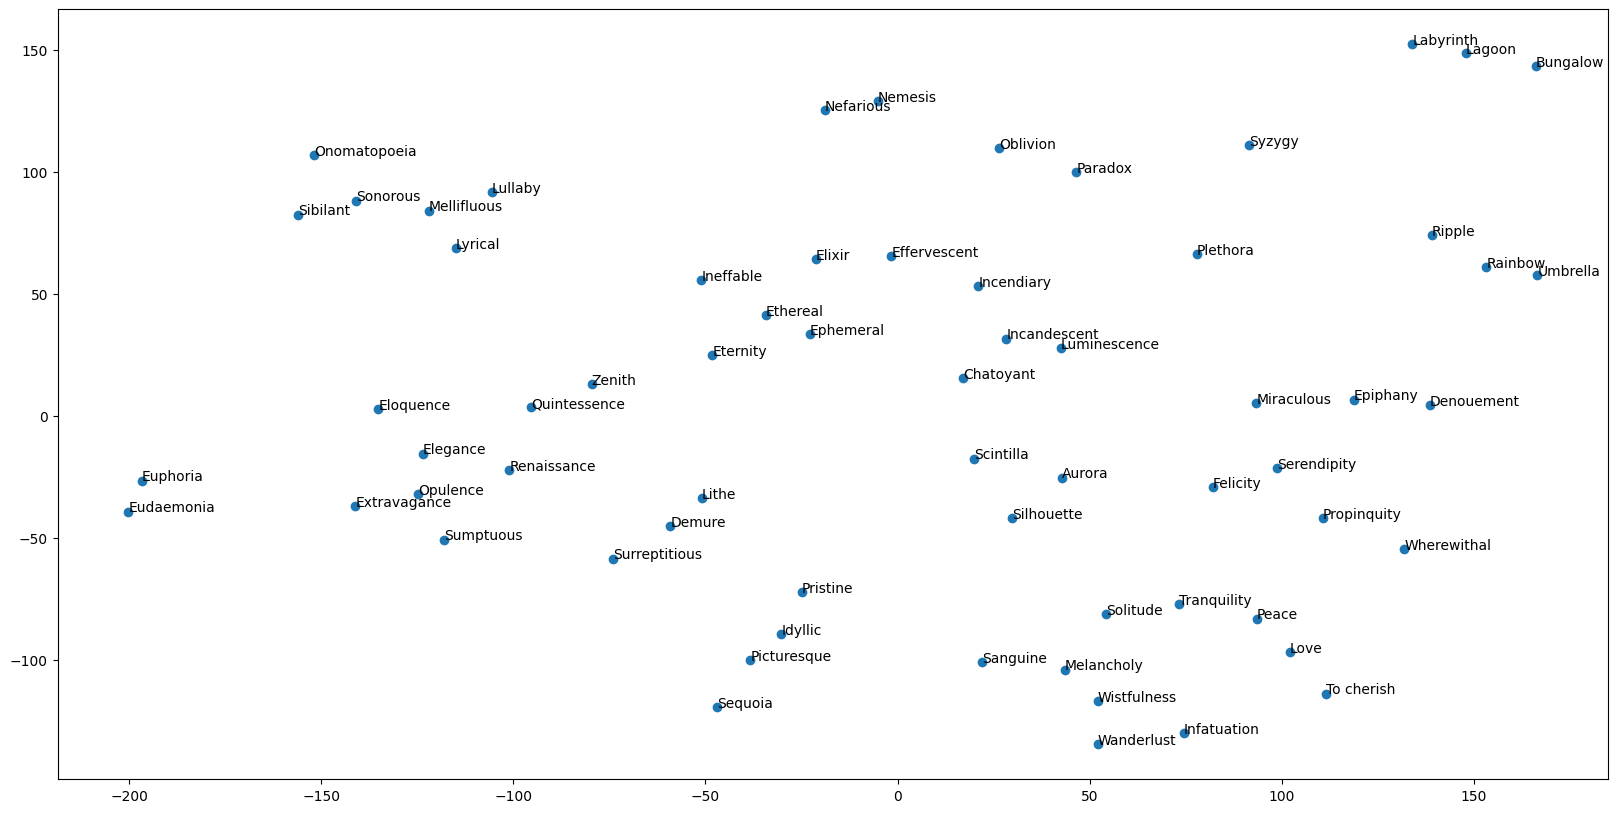

In [100]:
matrix = np.array(embeddings)
tsne = TSNE(n_components=2, perplexity=6, random_state=21, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
x = vis_dims[:,0]
y = vis_dims[:,1]
labels = words
plt.figure(figsize=(20,10))
[plt.text(i, j, l) for (i, j, l) in zip(x, y, labels)]
plt.scatter(x, y)